In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sns

In [35]:
a1 = pd.read_csv(r'D:\DATA_SCIENCE_COURSE\PROJECTS\PROJECT-3(GOLD)\Gold_data.csv', parse_dates=['date'])

# Set the 'date' column as the index
a1.set_index('date', inplace=True)
a1

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [36]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [37]:
a1.isnull().sum()

price    0
dtype: int64

In [38]:
a1['price'].iloc[:366]

date
2016-01-01    2252.600000
2016-01-02    2454.500000
2016-01-03    2708.100000
2016-01-04    2577.800000
2016-01-05    2597.750000
                 ...     
2016-12-27    2469.300000
2016-12-28    2484.300000
2016-12-29    2498.100000
2016-12-30    2497.800000
2016-12-31    2534.033333
Name: price, Length: 366, dtype: float64

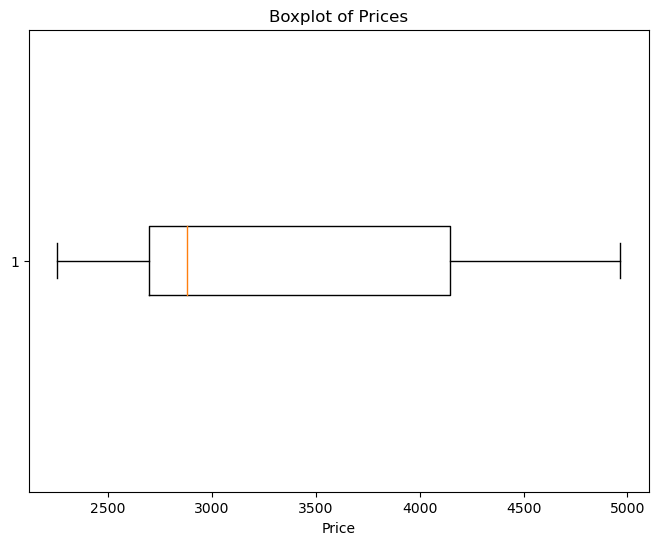

In [39]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(a1['price'],whis=1.0, vert=False)
plt.xlabel('Price')
plt.title('Boxplot of Prices')
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

time_series = a1['price']

def adf_test(time_series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(time_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    if result[1] < 0.05:
        print('\033[1m' + '\nThe time series is Stationary (reject the null hypothesis)' + '\033[0m')
    else:
        print('\033[1m' + '\nThe time series is NON-Stationary (fail to reject the null hypothesis)' + '\033[0m')


# Call the function with your time series data
adf_test(time_series)


ADF Statistic: -0.3099036570504783
p-value: 0.9240899189079186
Critical Values:
	1%: -3.4333881004322455
	5%: -2.8628821222065013
	10%: -2.5674844795732152

The time series is NON-Stationary (fail to reject the null hypothesis)


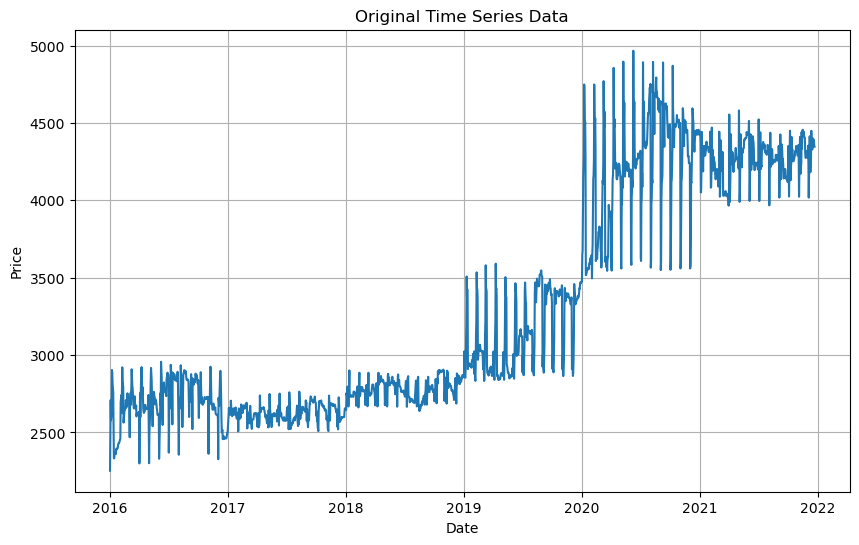

ADF Statistic: -0.3099036570504783
p-value: 0.9240899189079186


In [41]:
# Plot the time series data to visualize any trends or seasonality
plt.figure(figsize=(10, 6))
plt.plot(a1['price'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Perform Dickey-Fuller test to check for stationarity
result = adfuller(a1['price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [80]:
a2 = pd.DataFrame()
a2["price"] = a1["price"].rolling(10).mean()
a2 = a2.dropna()
a2["price"].head(20)

date
2016-01-10    2660.065000
2016-01-11    2710.785000
2016-01-12    2720.235000
2016-01-13    2682.985000
2016-01-14    2658.405000
2016-01-15    2635.210000
2016-01-16    2610.146667
2016-01-17    2556.600000
2016-01-18    2504.780000
2016-01-19    2459.340000
2016-01-20    2420.070000
2016-01-21    2383.650000
2016-01-22    2367.780000
2016-01-23    2373.553333
2016-01-24    2379.990000
2016-01-25    2383.350000
2016-01-26    2388.733333
2016-01-27    2394.780000
2016-01-28    2400.940000
2016-01-29    2408.020000
Name: price, dtype: float64

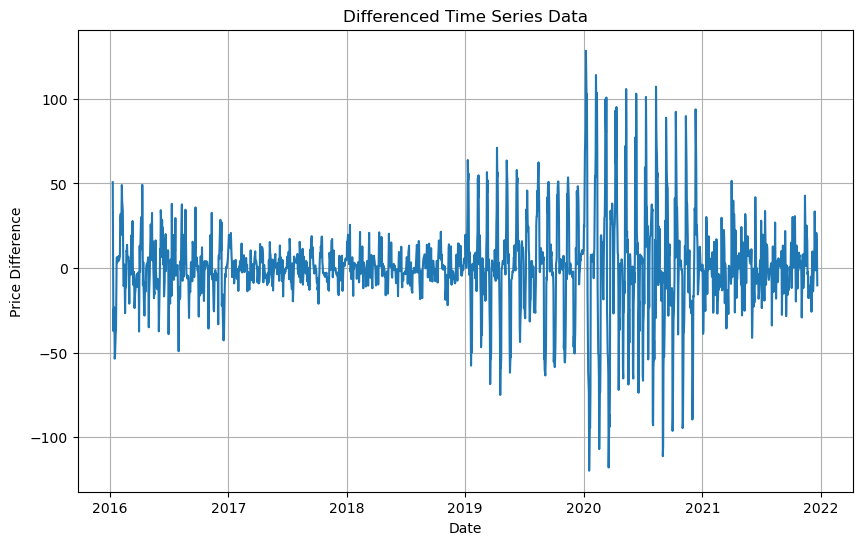

ADF Statistic after differencing: -10.81881017227904
p-value after differencing: 1.827846666932635e-19


In [43]:
# If the data is non-stationary, apply differencing
a2['diff'] = a2["price"].diff(1)
a2 = a2.dropna()
plt.figure(figsize=(10, 6))
plt.plot(a2['diff'])
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

# Perform Dickey-Fuller test again
result_diff = adfuller(a2['diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

In [44]:
a2

,price,diff
date,,
2016-01-11,2710.785,50.720
2016-01-12,2720.235,9.450
2016-01-13,2682.985,-37.250
2016-01-14,2658.405,-24.580
2016-01-15,2635.210,-23.195
...,...,...
2021-12-17,4327.050,7.500
2021-12-18,4347.850,20.800
2021-12-19,4364.860,17.010


In [45]:
# Set the significance level (alpha)
alpha = 0.05

# Perform hypothesis testing
if result_diff[1] < alpha:
    print('\033[1m' + '\nReject the null hypothesis (H0): The time series is stationary.')
else:
    print('\033[1m' + '\nFail to reject the null hypothesis (H0): The time series is not stationary.')



Reject the null hypothesis (H0): The time series is stationary.


 - For the value " d(Differencing Order) = 1 " , the time series is stationary.

In [46]:
train_size = int(len(a2) * 0.8)
train, test = a2[:train_size], a2[train_size:]
print(train)
print(test)

               price    diff
date                        
2016-01-11  2710.785  50.720
2016-01-12  2720.235   9.450
2016-01-13  2682.985 -37.250
2016-01-14  2658.405 -24.580
2016-01-15  2635.210 -23.195
...              ...     ...
2020-10-08  4167.620  41.150
2020-10-09  4177.210   9.590
2020-10-10  4183.270   6.060
2020-10-11  4275.560  92.290
2020-10-12  4349.580  74.020

[1737 rows x 2 columns]
              price   diff
date                      
2020-10-13  4406.64  57.06
2020-10-14  4442.17  35.53
2020-10-15  4478.17  36.00
2020-10-16  4503.88  25.71
2020-10-17  4517.44  13.56
...             ...    ...
2021-12-17  4327.05   7.50
2021-12-18  4347.85  20.80
2021-12-19  4364.86  17.01
2021-12-20  4373.80   8.94
2021-12-21  4363.56 -10.24

[435 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

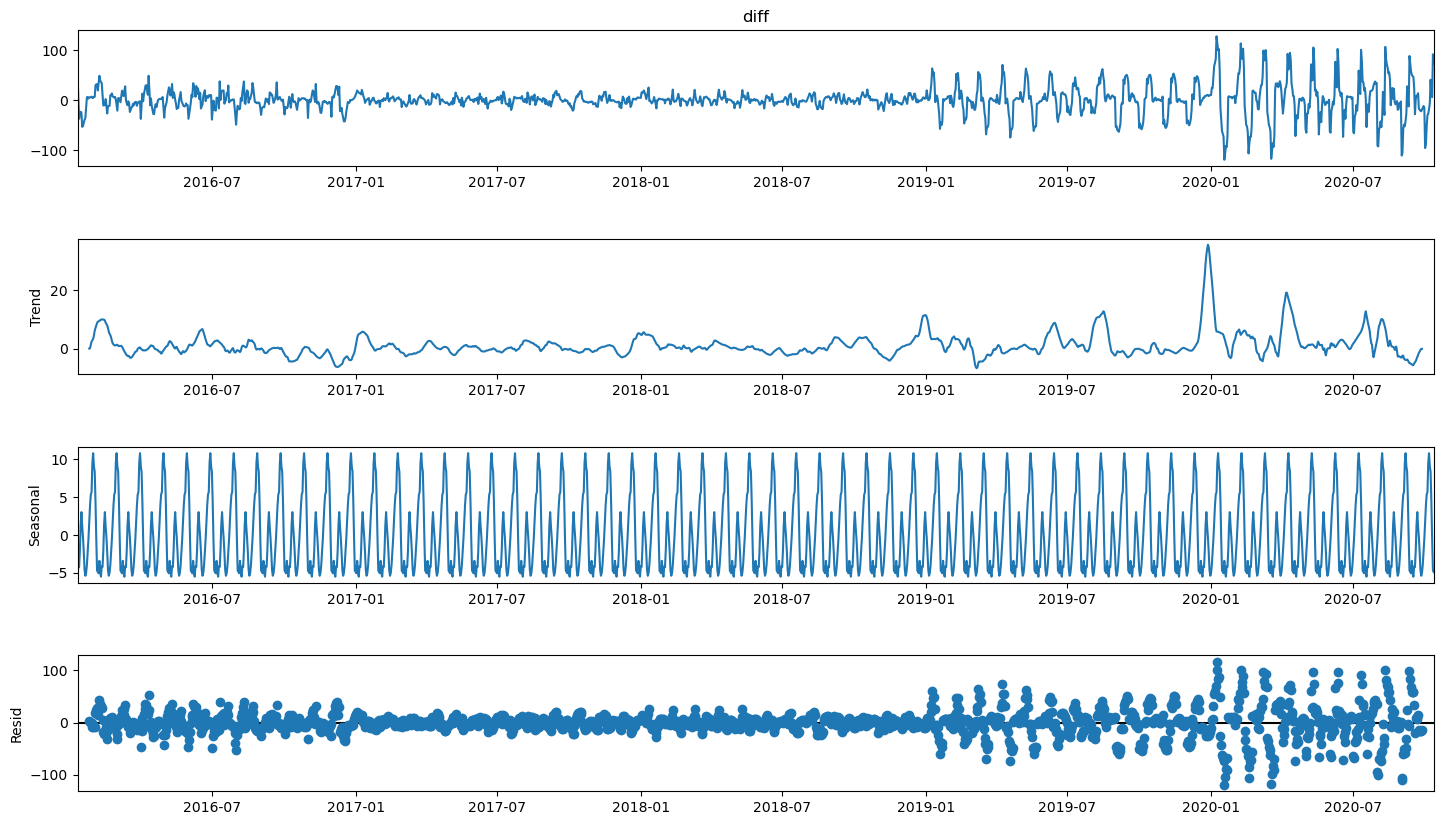

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(train['diff'], model='add', period = 30)
# period = 31  ,For monthly data with a consistent pattern every month,
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



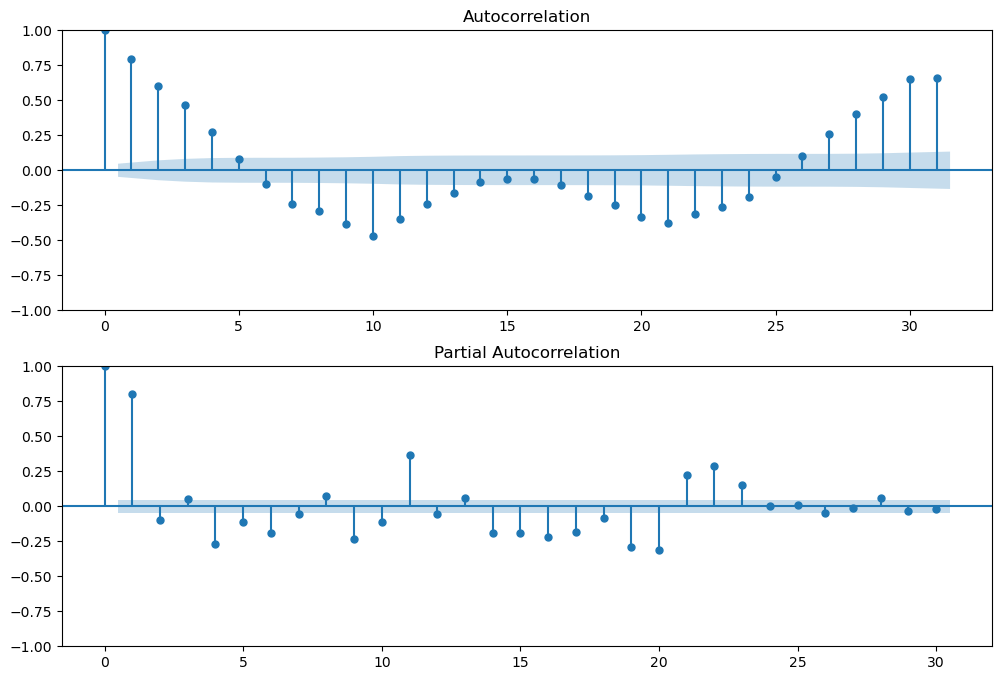

In [48]:
# Plot ACF and PACF to determine the order of ARIMA model
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train['diff'].dropna(), ax=ax1, lags=31)
plot_pacf(train['diff'].dropna(), ax=ax2, lags=30)
plt.show()


- p (AR Order) = 1 
- q (MA Order) = 1

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train["diff"], seasonal_order=(1, 0,1, 60), trend='n')
model_arima_fit = model_arima.fit()
print(f'AIC:{model_arima_fit.aic}')

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC:15755.395915088477


In [50]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                     diff   No. Observations:                 1737
Model:             ARIMA(1, 0, [1], 60)   Log Likelihood               -7874.698
Date:                  Tue, 02 Apr 2024   AIC                          15755.396
Time:                          20:34:30   BIC                          15771.776
Sample:                      01-11-2016   HQIC                         15761.453
                           - 10-12-2020                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L60       0.2941      0.033      9.045      0.000       0.230       0.358
ma.S.L60       0.2738      0.036      7.537      0.000       0.203       0.345
sigma2       501.6168      9.199     54.527      0.000     483.586     519.647
===================================================================================
Ljung-Box (L1) (Q):                 825.25   Jarque-Bera (JB):              1705.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.32   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Forecast the next 30 days
forecast = model_arima_fit.get_forecast(steps=30)

# Get the forecasted mean and the confidence intervals
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print the forecasted mean
print(mean_forecast)

# Compare with your test data
# Assuming your test data is in a DataFrame named 'test'
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['diff'].iloc[:30], mean_forecast)
print(f'MSE: {mse}')


2020-10-13    36.967028
2020-10-14    28.551814
2020-10-15    30.727880
2020-10-16    34.141042
2020-10-17    -1.829099
2020-10-18     7.815738
2020-10-19    19.780335
2020-10-20     2.872697
2020-10-21    11.895196
2020-10-22    -3.084920
2020-10-23    -5.970306
2020-10-24    -5.197068
2020-10-25    -1.789832
2020-10-26   -11.880220
2020-10-27   -10.706043
2020-10-28    -6.273975
2020-10-29     2.094347
2020-10-30     7.731533
2020-10-31   -59.284688
2020-11-01   -56.016819
2020-11-02   -32.371833
2020-11-03   -25.050332
2020-11-04   -27.687353
2020-11-05   -31.732499
2020-11-06   -18.127871
2020-11-07    17.734421
2020-11-08   -13.605040
2020-11-09   -18.354814
2020-11-10    45.905788
2020-11-11    37.247120
Freq: D, Name: predicted_mean, dtype: float64
MSE: 725.9150097982745


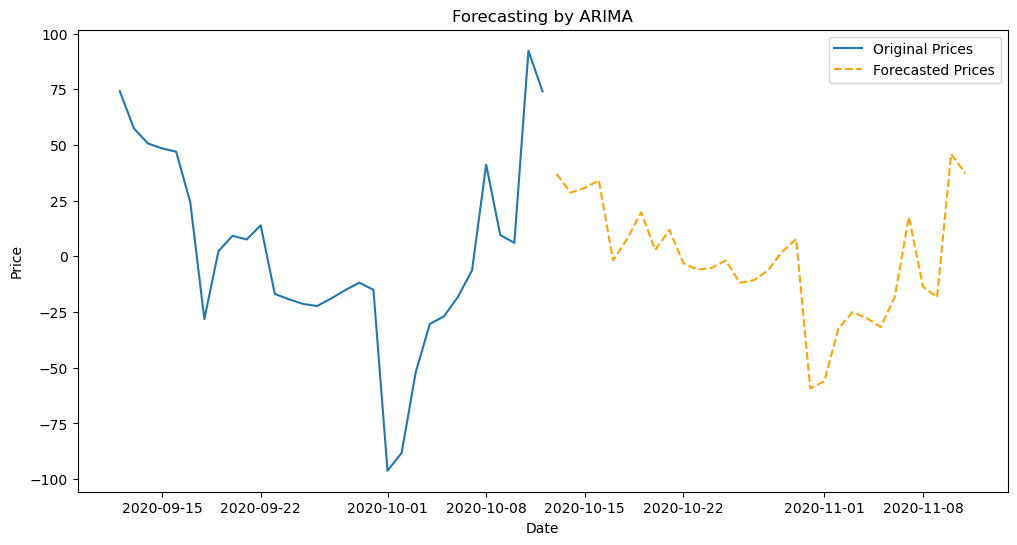

In [52]:
# Make predictions for n_periods = 30
n_periods = 30
forecastar = model_arima_fit.forecast(steps=n_periods)

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(a2.index[1706:1737], train['diff'].iloc[1706:], label='Original Prices')
plt.plot(forecastar.index, forecastar, label='Forecasted Prices', linestyle='dashed', color='orange')
plt.title('Forecasting by ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

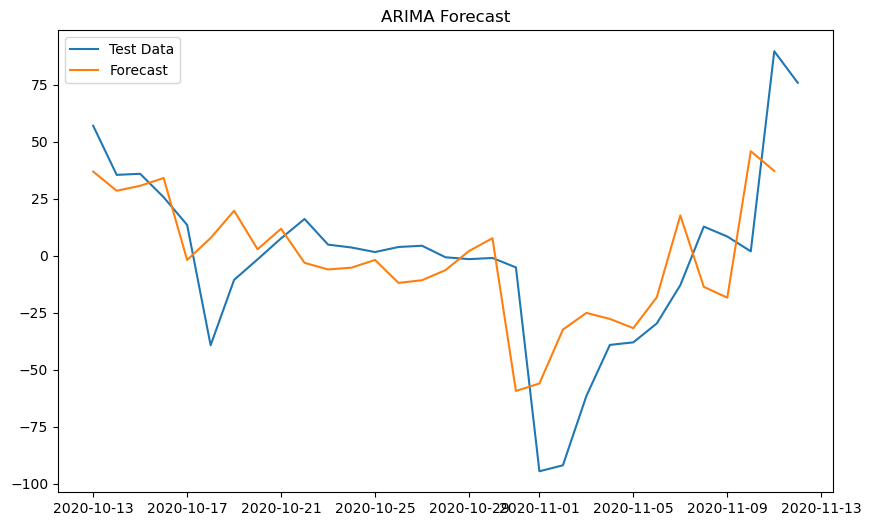

In [53]:
import matplotlib.pyplot as plt

# Plot the test data
plt.figure(figsize=(10,6))
plt.plot(test['diff'].iloc[:31], label='Test Data')

# Plot the forecasted values
plt.plot(forecastar, label='Forecast')
plt.title("ARIMA Forecast")

# Add a legend
plt.legend(loc='best')

# Display the plot
plt.show()


In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model_sarima = SARIMAX(train["diff"], order=(1, 0, 1), seasonal_order=(1, 0, 1, 30))  # Example seasonal_order (P, D, Q, S)
model_sarima_fit = model_sarima.fit()
print(f'AIC:{model_sarima_fit.aic}')

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



AIC:14183.652009280253


In [55]:
# Forecast the next 30 days
forecast1 = model_sarima_fit.get_forecast(steps=30)

# Get the forecasted mean and the confidence intervals
mean_forecast1 = forecast1.predicted_mean
confidence_intervals1 = forecast1.conf_int()

# Print the forecasted mean
print(mean_forecast1)

# Compare with your test data
# Assuming your test data is in a DataFrame named 'test'
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(test['diff'].iloc[:30], mean_forecast)
print(f'MSE: {mse1}')


2020-10-13    56.571744
2020-10-14    46.373887
2020-10-15    40.164534
2020-10-16    34.668181
2020-10-17    20.096089
2020-10-18    -3.669298
2020-10-19     7.920335
2020-10-20     8.697911
2020-10-21     7.764089
2020-10-22     8.577385
2020-10-23    -5.282494
2020-10-24    -6.736716
2020-10-25    -7.740815
2020-10-26    -9.109928
2020-10-27    -7.831190
2020-10-28    -5.944434
2020-10-29    -4.818532
2020-10-30    -6.468344
2020-10-31   -45.140481
2020-11-01   -41.478554
2020-11-02   -24.341008
2020-11-03   -14.788247
2020-11-04   -13.560413
2020-11-05    -9.338445
2020-11-06    -3.537967
2020-11-07    18.503688
2020-11-08     3.917176
2020-11-09     2.518429
2020-11-10    42.847448
2020-11-11    34.500007
Freq: D, Name: predicted_mean, dtype: float64
MSE: 725.9150097982745


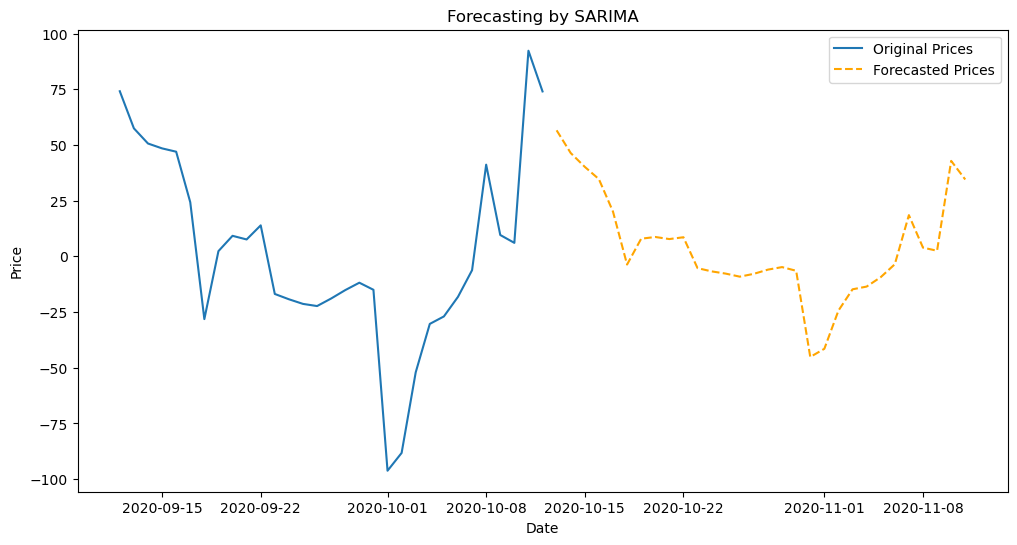

In [56]:
# Make predictions for n_periods = 30
n_periods = 30
forecastsa = model_sarima_fit.forecast(steps=n_periods)

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(a2.index[1706:1737], train['diff'].iloc[1706:], label='Original Prices')
plt.plot(forecastsa.index, forecastsa, label='Forecasted Prices', linestyle='dashed', color='orange')
plt.title('Forecasting by SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

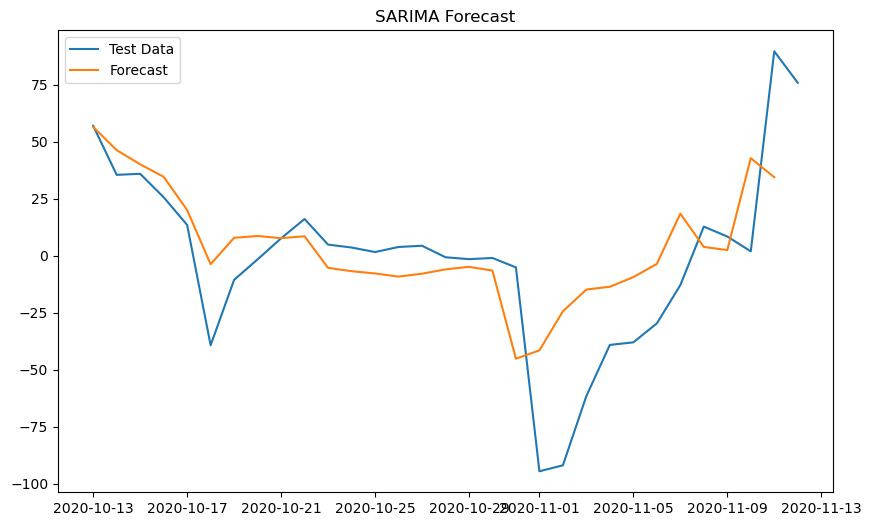

In [57]:
import matplotlib.pyplot as plt

# Plot the test data
plt.figure(figsize=(10,6))
plt.plot(test['diff'].iloc[:31], label='Test Data')

# Plot the forecasted values
plt.plot(forecastsa, label='Forecast')
plt.title("SARIMA Forecast")

# Add a legend
plt.legend(loc='best')

# Display the plot
plt.show()


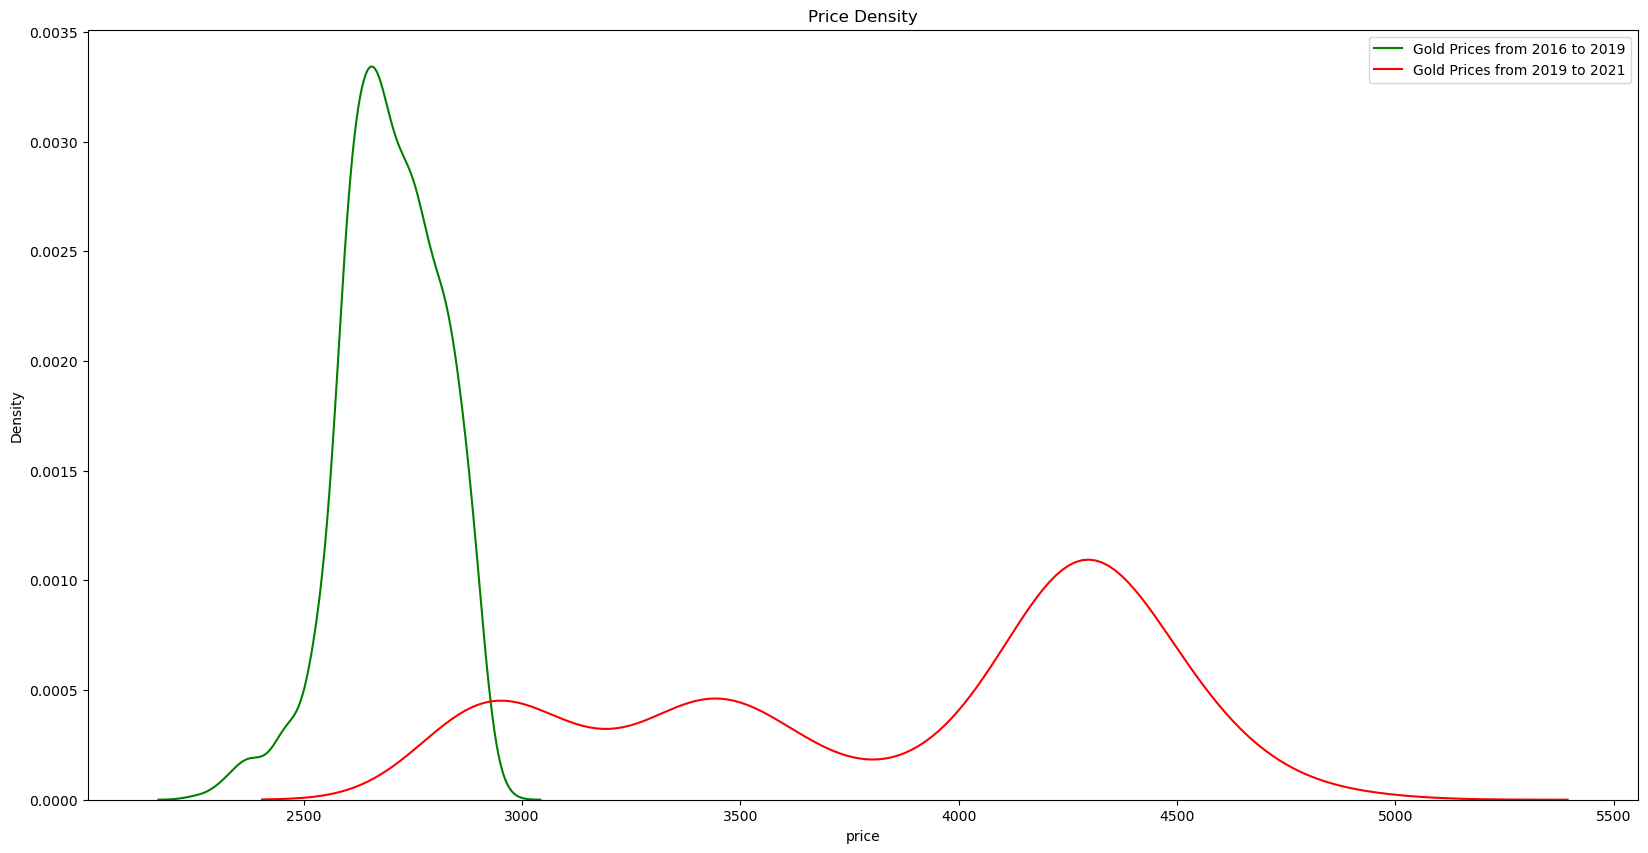

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Plot 1
sns.kdeplot(a1['price'].iloc[:1096], color='green', label='Gold Prices from 2016 to 2019')
plt.title('Price Density')

# Plot 2
sns.kdeplot(a1['price'].iloc[1096:2183], color='red', label='Gold Prices from 2019 to 2021')
plt.title('Price Density')

plt.legend()
plt.show()


- Green line - Provides information about Frequency of gold prices over period of 2016 to 2019 , indicates that most of the time gold price is saturated/stablelized between [2500 - 2800] Rupees means gold prices have not much changed during years

- Red line - Gold prices over period of 2019 to 2021 ,indicates that prices gradually increasing over the time ,gold prices are not stable over any specific range of price during mean time. 

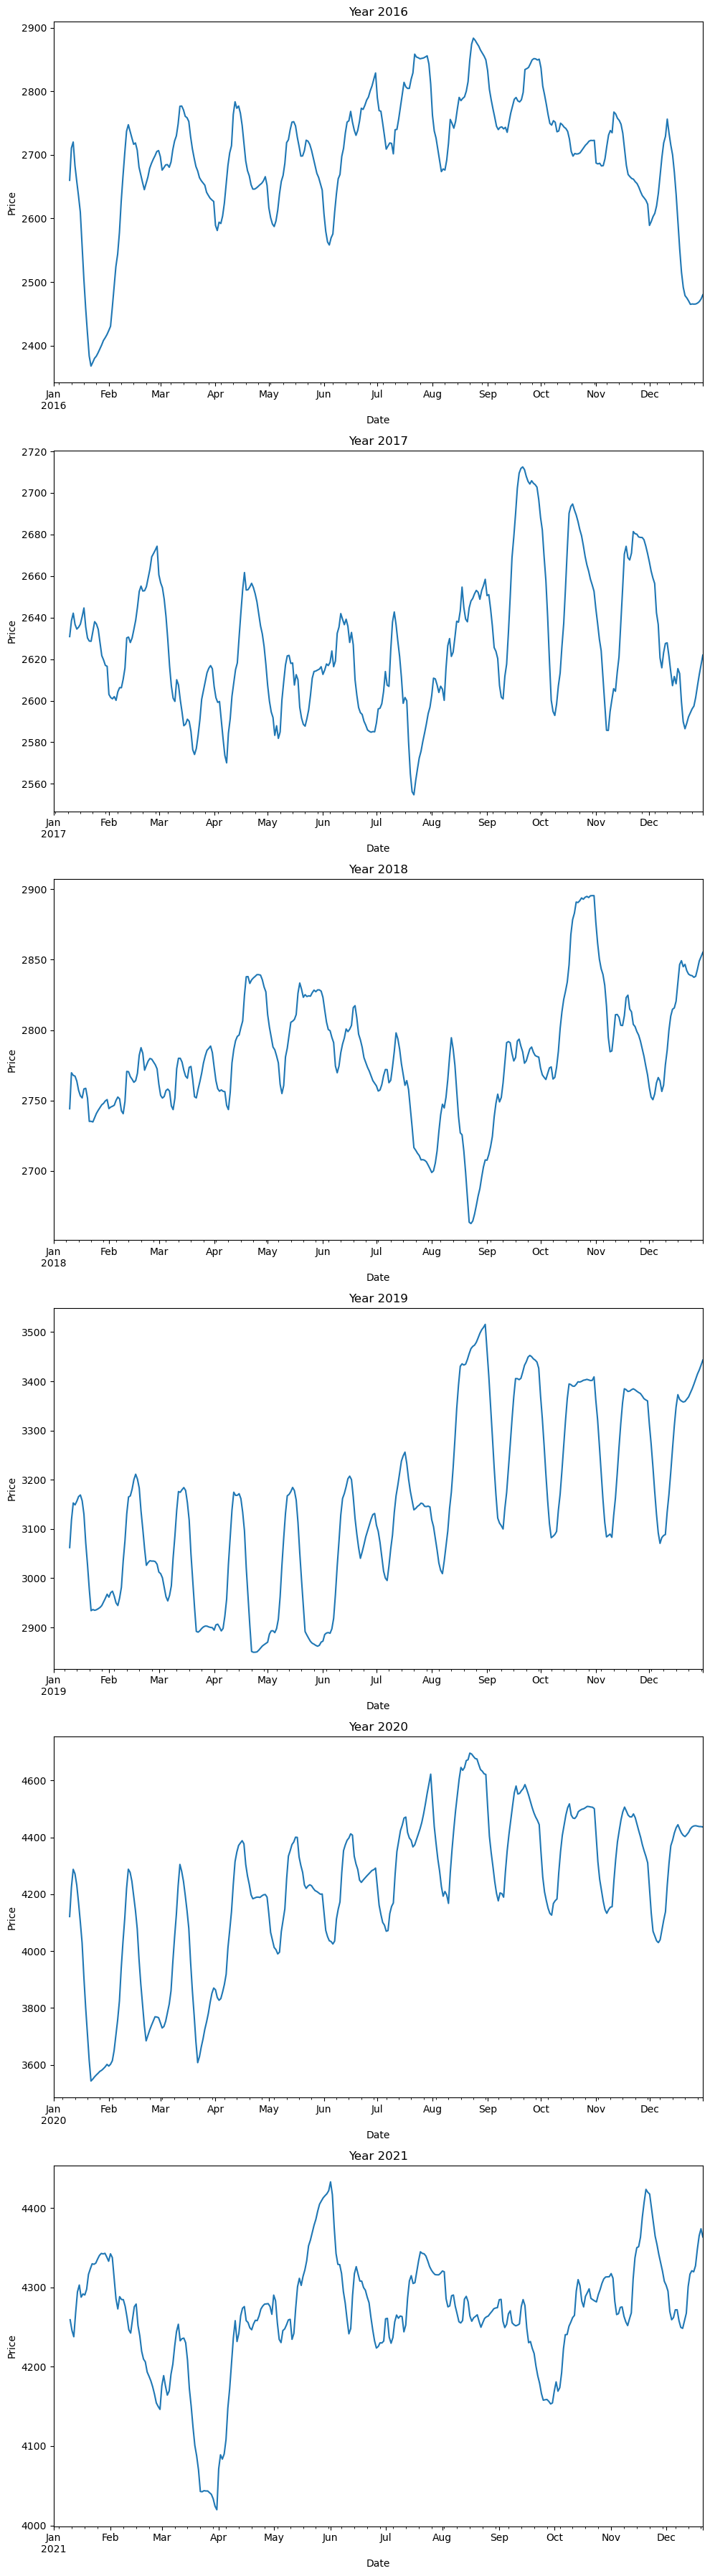

In [59]:
# Create separate plots for each year
years = a1.index.year.unique()
fig, axes = plt.subplots(nrows=len(years), ncols=1,figsize=(10, 6 * len(years)))

for i, year in enumerate(years):
    year_data = a1[a1.index.year == year]
    
    if len(years) == 1:
        ax = axes
    else:
        ax = axes[i]
    
    year_data["price"].rolling(10).mean().plot(ax=ax)
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

plt.tight_layout()
plt.show()

###### Above Graphs gives information:
- Trend of Gold price v/s year(Jan to Dec) for every year.
- Behaviour of gold price trend for every year

In [60]:
import plotly.graph_objects as go

# Assuming 'a1' is your DataFrame and it has a DateTimeIndex
a1['year'] = a1.index.year

# Get the highest price for each year
highest_prices = a1.groupby('year')['price'].max()

# Create a bar plot
fig = go.Figure(data=go.Bar(x=highest_prices.index, y=highest_prices.values))
fig.update_layout(title_text='Highest Price Recorded Each Year', xaxis_title='Year', yaxis_title='Price')
fig.show()


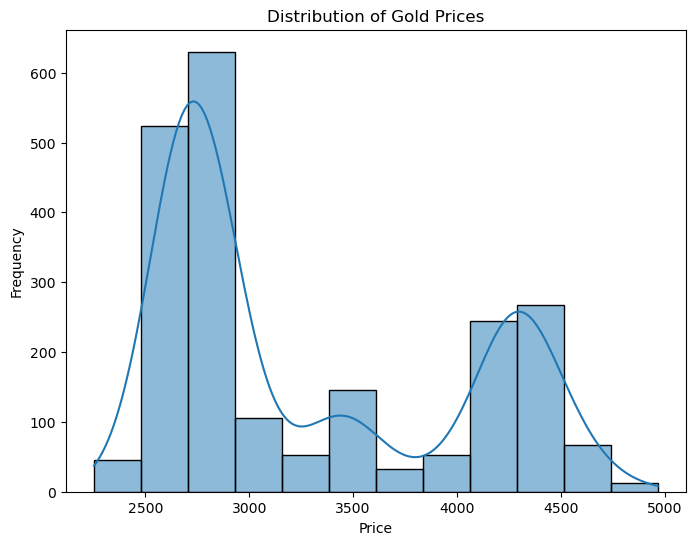

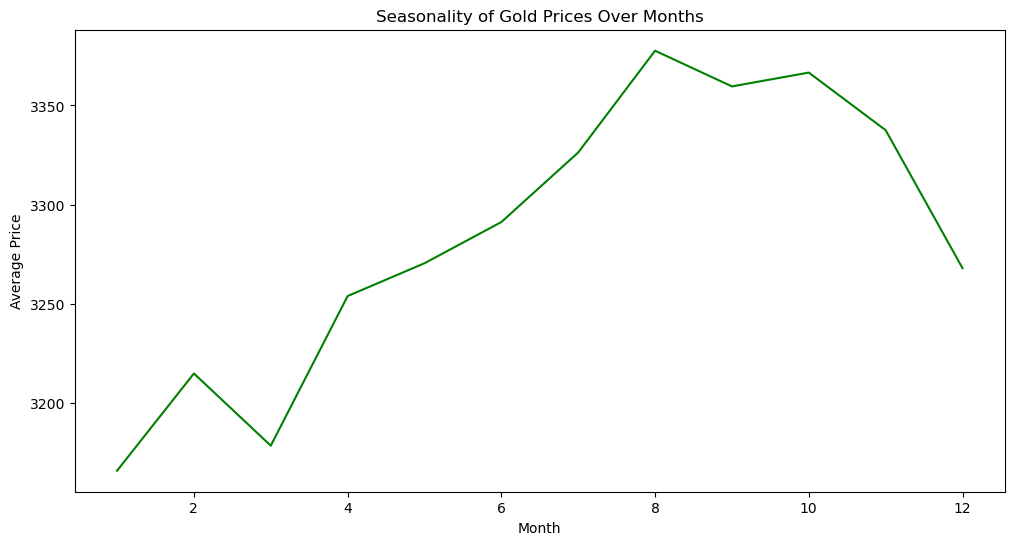

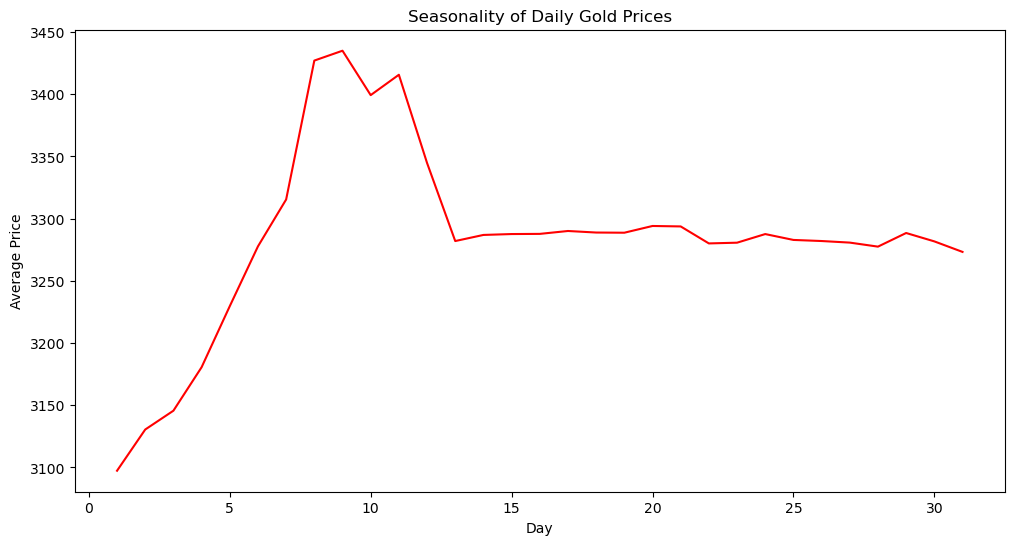

In [61]:
# Histogram - Distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(a1['price'], kde=True,bins = 12 )
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Monthly Seasonality plot
plt.figure(figsize=(12, 6))
a1['price'].groupby(a1.index.month).mean().plot(kind='line',color = 'green' )
plt.title('Seasonality of Gold Prices Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

#Daily Seasonality plot
plt.figure(figsize=(12, 6))
a1['price'].groupby(a1.index.day).mean().plot(kind='line',color = 'red')
plt.title('Seasonality of Daily Gold Prices')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.show()

###### Distribution of Gold Prices 
- Information about frequency Distribution of gold price  

###### Monthly Seasonality plot
- It provides insights into the variability of gold prices over different months. 

###### Daily Seasonality plot 
- It provides insights into the variability of gold prices over different days. 

These visualizations aid in decision-making processes, especially in sectors like finance and investment, where understanding price trends can lead to profitable decisions.

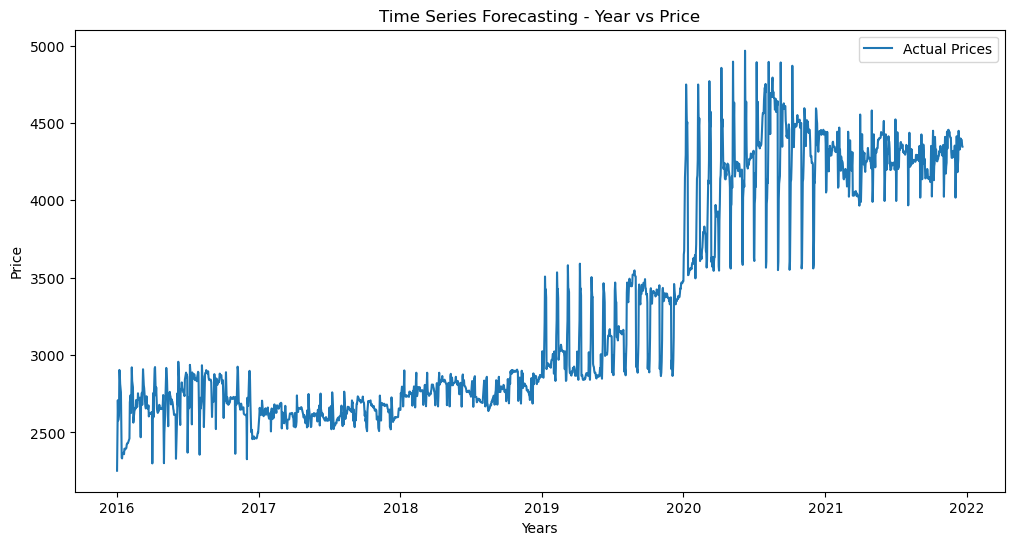

In [62]:
# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(a1.index, a1['price'], label='Actual Prices')

plt.title('Time Series Forecasting - Year vs Price')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()
plt.show()


###### Stable Prices
- From 2016 to late 2019, the prices remained relatively stable with minor fluctuations around the range of 2500-3000. This suggests that during this period, the gold market was relatively steady.
###### Price Increase
- There is a noticeable spike in prices starting late 2019, peaking at approximately early 2021 at around a price of just below 4500. 
###### Post-Peak Fluctuations
- After the peak, there are visible fluctuations but overall stabilization of prices at higher levels than previous years. This indicates that while the price of gold has come down from its peak, it is still higher compared to the prices before 2019.

## Moving Average

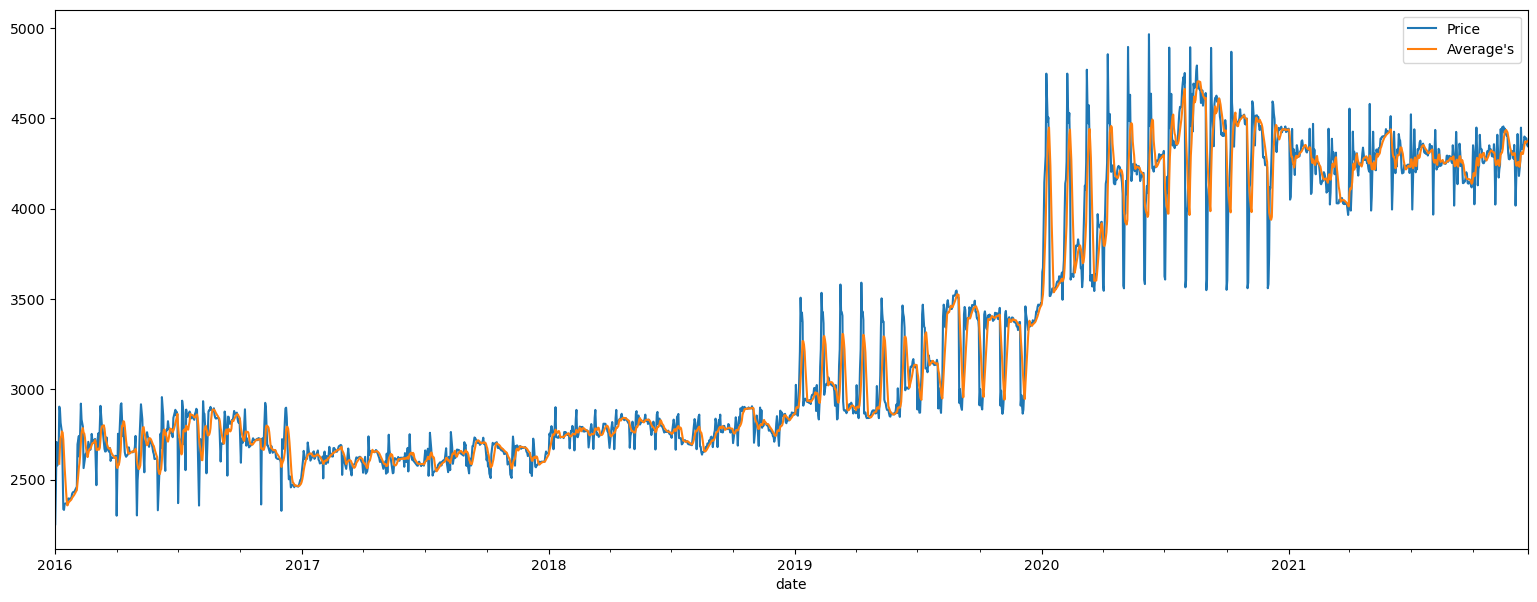

In [63]:
plt.figure(figsize=(19,7))
a1.price.plot(label="Price")
pred = pd.DataFrame()
pred["Moving_Avg"] = a1["price"].rolling(7).mean()
pred["Moving_Avg"].plot(label="Average's")
plt.legend(loc='best')

###### Price Trend 
- The line representing the actual price shows the fluctuations in the price of gold over time. This can help identify short-term trends and volatility in the price.
###### Trend Identification
- When the price line crosses above the moving average line, it’s often seen as a bullish (upward) trend, and when it crosses below, it’s seen as a bearish (downward) trend.
###### Market Volatility
- The distance between the price line and the moving average line can give an indication of market volatility. If the price line frequently crosses the moving average line, the market is considered volatile.

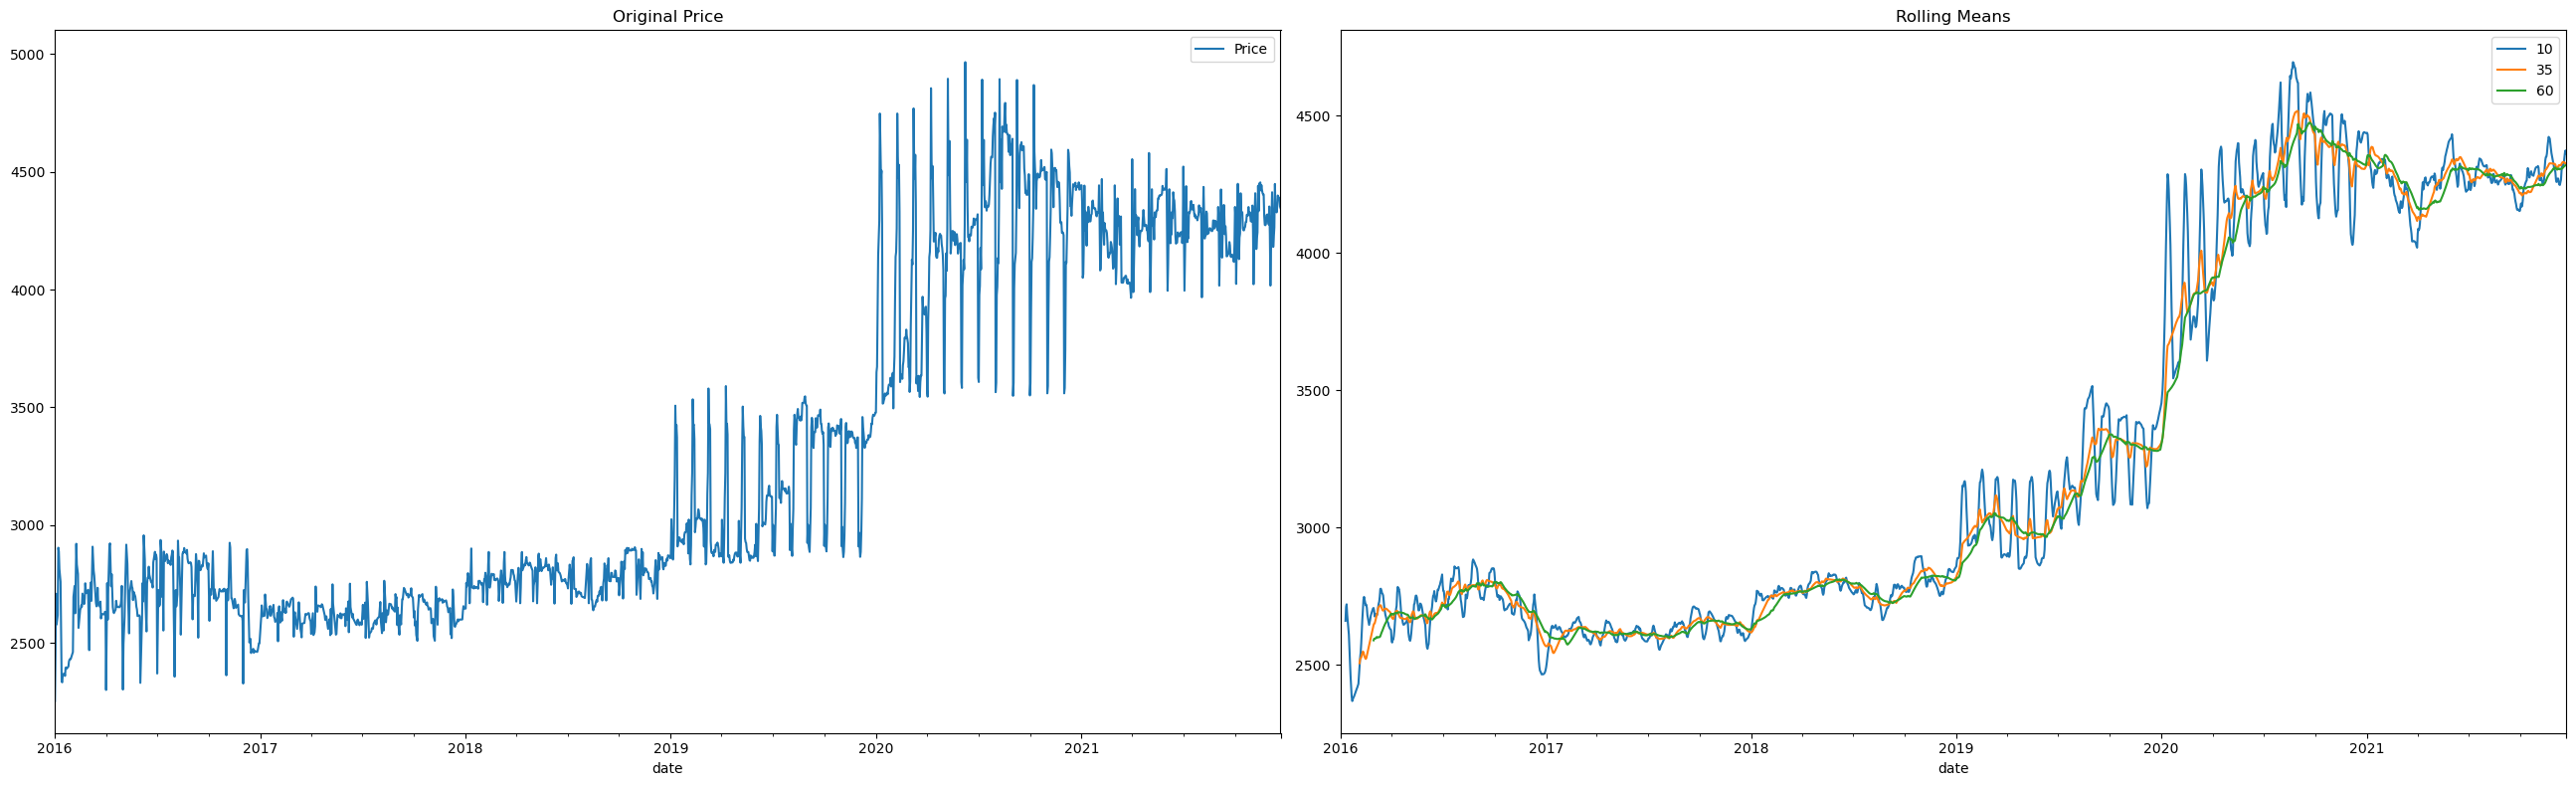

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 8))

# Plot original price
plt.subplot(1, 2, 1)
a1['price'].plot(label="Price")
plt.title('Original Price')
plt.legend()

# Plot rolling means
plt.subplot(1, 2, 2)
for i in range(10, 70, 25):
    a1['price'].rolling(i).mean().plot(label=str(i))

plt.title('Rolling Means')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## Time series decomposition plot

<Figure size 640x480 with 0 Axes>

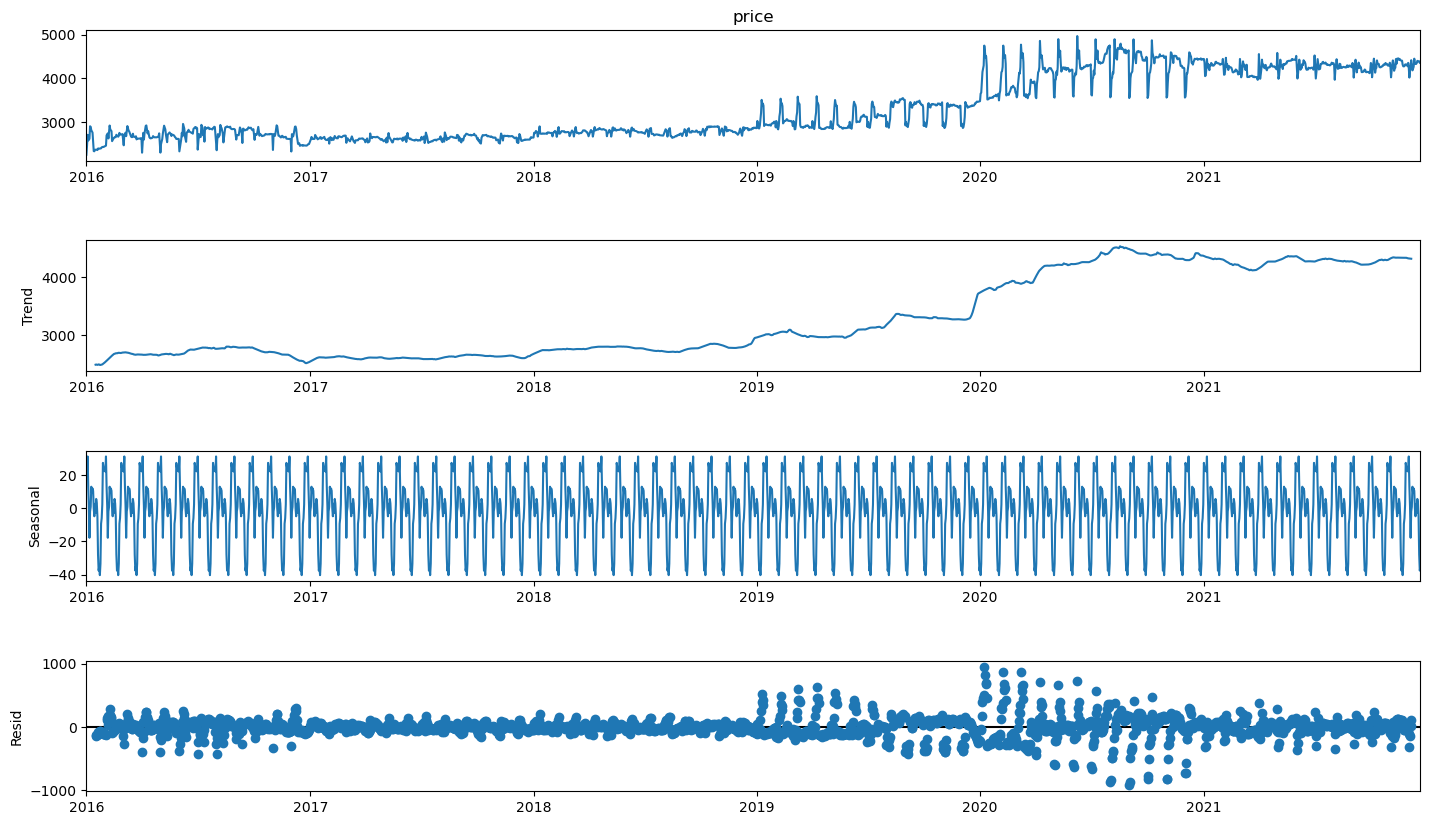

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(a1['price'], model='30', period = 30)
# period = 31  ,For monthly data with a consistent pattern every month,
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

## ACF plots and PACF plots 
### (For Daily Data)

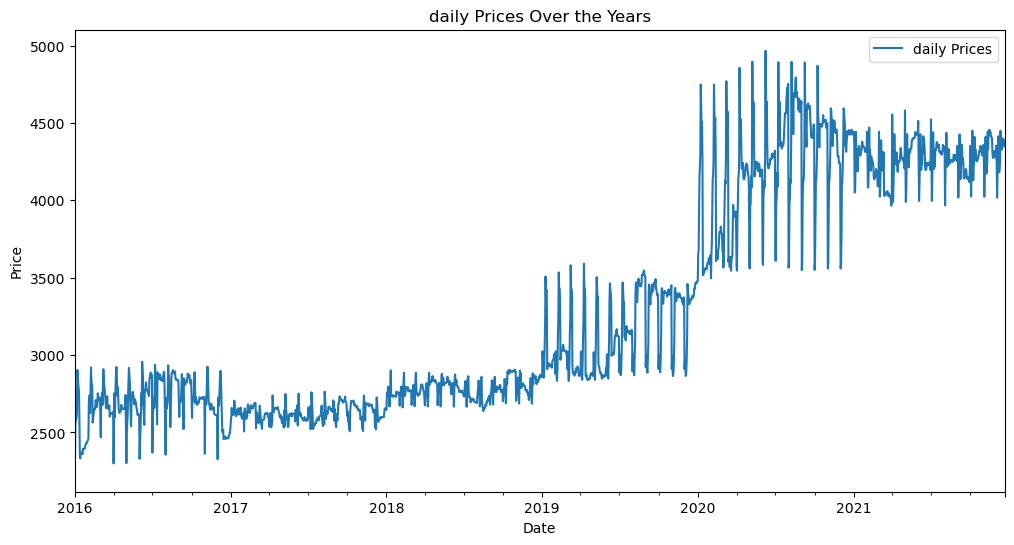

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



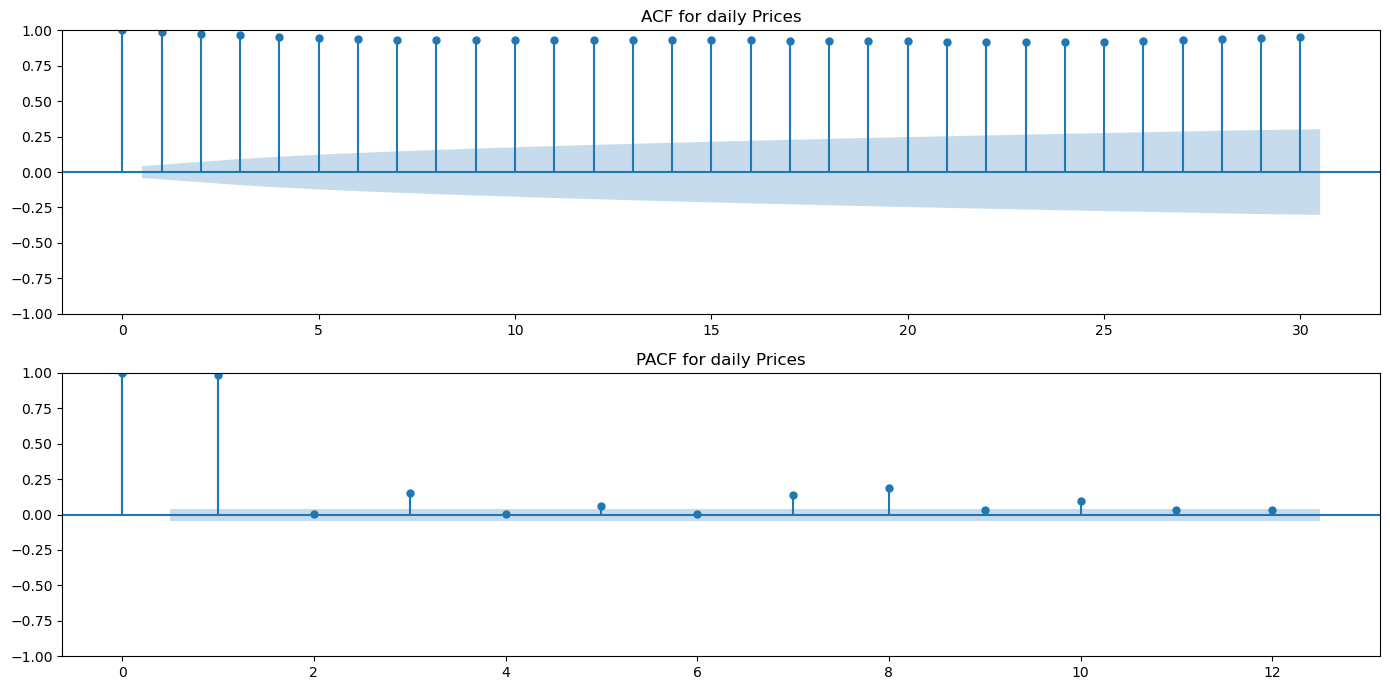

In [70]:
# Resample the data to daily frequency

daily_prices = a1['price'].resample('D').mean()

# Plot the original daily prices
plt.figure(figsize=(12, 6))
daily_prices.plot(label='daily Prices')
plt.title('daily Prices Over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot ACF and PACF
plt.figure(figsize=(14, 7))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(daily_prices, lags=30, ax=plt.gca())
plt.title('ACF for daily Prices')


# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(daily_prices, lags=12, ax=plt.gca())
plt.title('PACF for daily Prices')

plt.tight_layout()
plt.show()

###### ACF (AutoCorrelation Function)
- ACF measures the correlation between a time series and its lagged values.                                                     It helps identify patterns such as seasonality and trends in the data.                                                            Used to determine the order of the autoregressive (AR) component in time series forecasting models.

###### PACF (Partial AutoCorrelation Function)
- PACF measures the correlation between a time series and its lagged values while removing the effects of intermediate lags. It helps identify the direct relationship between an observation and its past observations. Used to determine the order of the moving average (MA) component in time series forecasting models.

###### Uses

- Identifying seasonality and trends.

- Determining the order of autoregressive (AR) and moving average (MA) components in time series models such as ARIMA (AutoRegressive Integrated Moving Average).

#### Forecasting Models
- Insights from ACF and PACF plots can be used to build forecasting models like ARIMA to predict future prices.
#### Anomaly Detection
- Any spikes or drops can be further analyzed to understand their causes, helping in anomaly detection.

In [71]:
print(daily_prices)

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Freq: D, Name: price, Length: 2182, dtype: float64


## Model Validation

In [72]:
a1 = a1.drop(columns='year')

In [73]:
train_size = int(len(a1) * 0.8)
traina1, testa1 = a1[:train_size], a1[train_size:]

arima_model = ARIMA(traina1, seasonal_order=(1,1, 2,30))
arima_results = arima_model.fit()

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [74]:
print(train.shape)
print(test.shape)

(1737, 2)
(435, 2)


In [75]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:                       price   No. Observations:                 1745
Model:             ARIMA(1, 1, [1, 2], 30)   Log Likelihood              -11189.240
Date:                     Tue, 02 Apr 2024   AIC                          22386.480
Time:                             20:38:34   BIC                          22408.269
Sample:                         01-01-2016   HQIC                         22394.543
                              - 10-10-2020                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L30       0.9766      0.036     26.839      0.000       0.905       1.048
ma.S.L30      -1.0935      0.047    -23.459      0.000      -1.185      -1.002
ma.S.L60       0.1499      0.023      6.542      0.000       0.105       0.195
sigma2      2.702e+04    436.308     61.930      0.000    2.62e+04    2.79e+04
===================================================================================
Ljung-Box (L1) (Q):                 826.51   Jarque-Bera (JB):             14988.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                             2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
# Forecast the next 30 days
forecast2 = arima_results.get_forecast(steps=30)

# Get the forecasted mean and the confidence intervals
mean_forecast2 = forecast2.predicted_mean
confidence_intervals2 = forecast2.conf_int()

# Print the forecasted mean
print(mean_forecast2)

# Compare with your test data
# Assuming your test data is in a DataFrame named 'test'
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(testa1.iloc[:30], mean_forecast)
print(f'MSE: {mse2}')


2020-10-11    4484.856883
2020-10-12    4441.454441
2020-10-13    4643.353600
2020-10-14    4674.121312
2020-10-15    4676.975666
2020-10-16    4698.049930
2020-10-17    4672.241195
2020-10-18    4670.168205
2020-10-19    4674.706394
2020-10-20    4670.697995
2020-10-21    4586.378647
2020-10-22    4562.719196
2020-10-23    4486.357489
2020-10-24    4497.957295
2020-10-25    4493.709134
2020-10-26    4484.667380
2020-10-27    4491.597403
2020-10-28    4539.909124
2020-10-29    4568.644710
2020-10-30    4516.490398
2020-10-31    3560.142338
2020-11-01    3618.661554
2020-11-02    3927.364858
2020-11-03    4144.250785
2020-11-04    4158.368654
2020-11-05    4245.966533
2020-11-06    4389.612127
2020-11-07    4924.924834
2020-11-08    4635.259693
2020-11-09    4572.695544
Freq: D, Name: predicted_mean, dtype: float64
MSE: 19220106.384615336


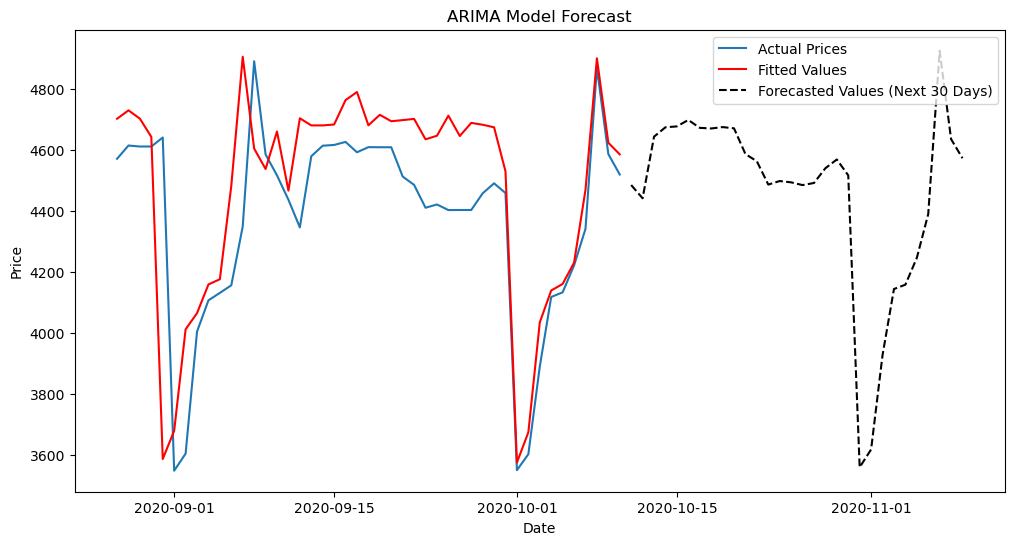

In [78]:
# Forecast future values for the next 30 days
future_steps = 30
forecast3 = arima_results.forecast(steps=future_steps)

# Plotting the original series, fitted values, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(traina1.iloc[1700:], label='Actual Prices')
plt.plot(arima_results.fittedvalues.iloc[1700:], color='red', label='Fitted Values')
plt.plot(forecast3, color='black', linestyle='dashed', label='Forecasted Values (Next 30 Days)')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [79]:
if 'price' in a2.columns:
    a2 = a2.drop(columns='price')

In [86]:
train_size = int(len(a2) * 0.8)
a2['diff'] = a2['price'].diff()
a2 = a2.dropna()
train, test = a2[:train_size], a2[train_size:]
print(train.shape)
print(test.shape)

(1736, 2)
(434, 2)


C:\Users\Tirum\AppData\Local\Temp\ipykernel_1536\764895174.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
a2

,price,diff
date,,
2016-01-13,2682.985000,-37.250000
2016-01-14,2658.405000,-24.580000
2016-01-15,2635.210000,-23.195000
2016-01-16,2610.146667,-25.063333
2016-01-17,2556.600000,-53.546667
...,...,...
2021-12-17,4327.050000,7.500000
2021-12-18,4347.850000,20.800000
2021-12-19,4364.860000,17.010000


Epoch 1/100
68/68 [==============================] - 2s 3ms/step - loss: 0.0860
Epoch 2/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 8/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 9/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 10/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 11/100
68/68 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 12/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 13/100
68/68 [=================

1/1 [==============================] - 0s 23ms/step


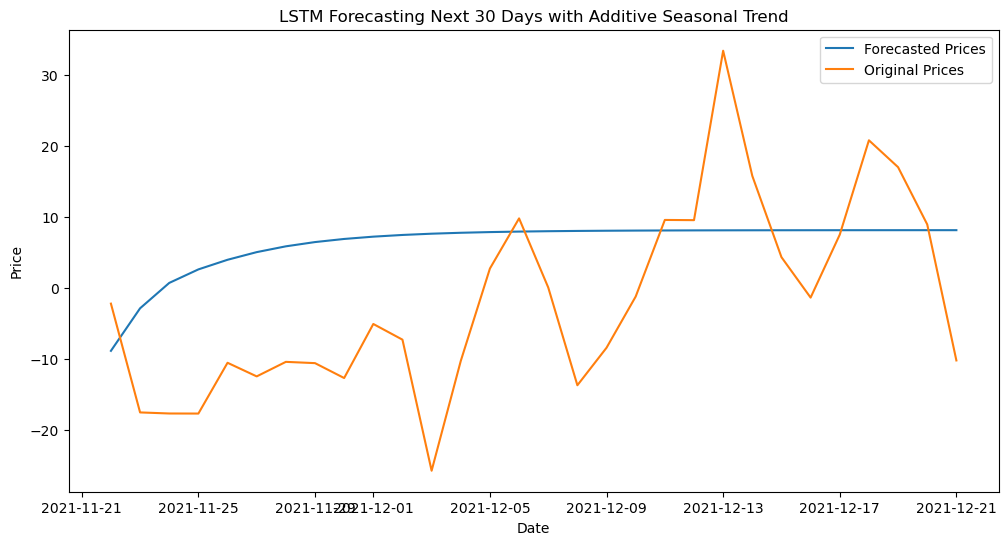

Mean Error (LSTM): 13.409007313918993


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Convert the time series to a numpy array
price_series = a2['diff'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
price_series_scaled = scaler.fit_transform(price_series)

# Function to prepare the LSTM input data
def create_lstm_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the number of time steps
time_steps = 3  # You can adjust this parameter based on your data and problem

# Create LSTM input data for training
X_train, y_train = create_lstm_dataset(price_series_scaled, time_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Create LSTM input data for forecasting (using the last 'time_steps' data points from training data)
X_forecast = price_series_scaled[-time_steps:].reshape(1, -1, 1)

# Forecast the next 'forecast_steps' days
forecast_steps = 30  # Number of days to forecast
forecast_predictions_scaled = []
for _ in range(forecast_steps):
    forecast = model.predict(X_forecast)
    forecast_predictions_scaled.append(forecast[0, 0])
    X_forecast = np.roll(X_forecast, -1)
    X_forecast[0, -1, 0] = forecast

# Invert the forecast predictions to original scale
forecast_predictions_original = scaler.inverse_transform(np.array(forecast_predictions_scaled).reshape(-1, 1))

# Visualize the results (forecasted data and original data)
plt.figure(figsize=(12, 6))
plt.plot(a2.index[-30:], forecast_predictions_original, label='Forecasted Prices')
plt.plot(a2.index[-30:], a2['diff'].values[-30:], label='Original Prices')
plt.title('LSTM Forecasting Next 30 Days with Additive Seasonal Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate mean error using the original data
mean_error = np.mean(np.abs(a2['diff'].values[-30:] - forecast_predictions_original))
print(f"Mean Error (LSTM): {mean_error}")


Epoch 1/100
68/68 [==============================] - 2s 3ms/step - loss: 0.0803
Epoch 2/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 4/100
68/68 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 6/100
68/68 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 8/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 9/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 10/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 11/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 12/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 13/100
68/68 [=================

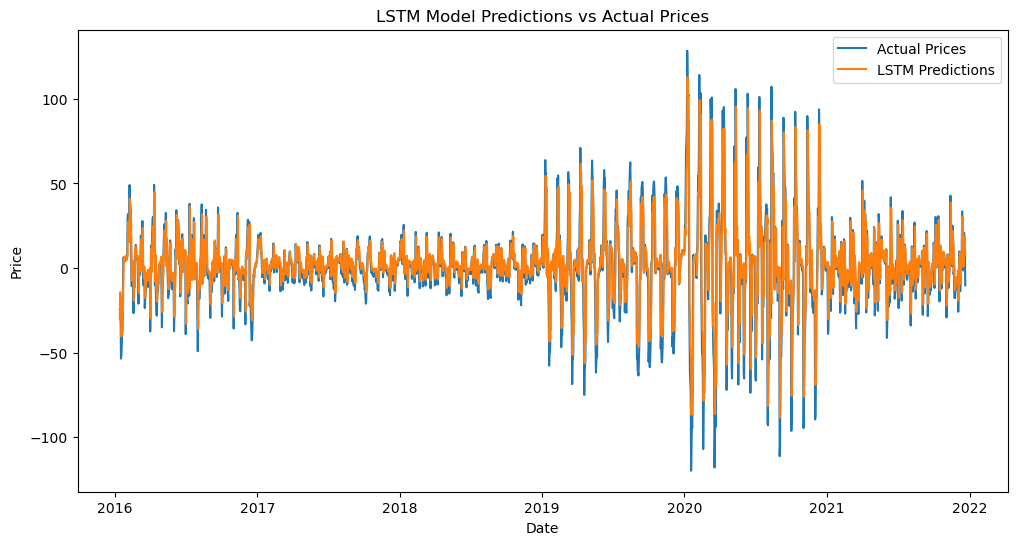

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Convert the time series to a numpy array
price_series = a2.values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
price_series_scaled = scaler.fit_transform(price_series)

# Function to prepare the LSTM input data
def create_lstm_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the number of time steps
time_steps = 3  # You can adjust this parameter based on your data and problem

# Create LSTM input data
X, y = create_lstm_dataset(price_series_scaled, time_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Predictions on the training data for illustration (replace with future data for forecasting)
train_predictions = model.predict(X)

# Invert the predictions to original scale
train_predictions_original = scaler.inverse_transform(train_predictions)
y_original = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate RMSE on the training data for illustration
rmse = np.sqrt(mean_squared_error(y_original, train_predictions_original))
print(f"Root Mean Squared Error (LSTM): {rmse}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(a2.index[time_steps:], y_original, label='Actual Prices')
plt.plot(a2.index[time_steps:], train_predictions_original, label='LSTM Predictions')
plt.title('LSTM Model Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 8/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 9/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 10/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 11/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 12/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 13/100
68/68 [=================

1/1 [==============================] - 0s 19ms/step


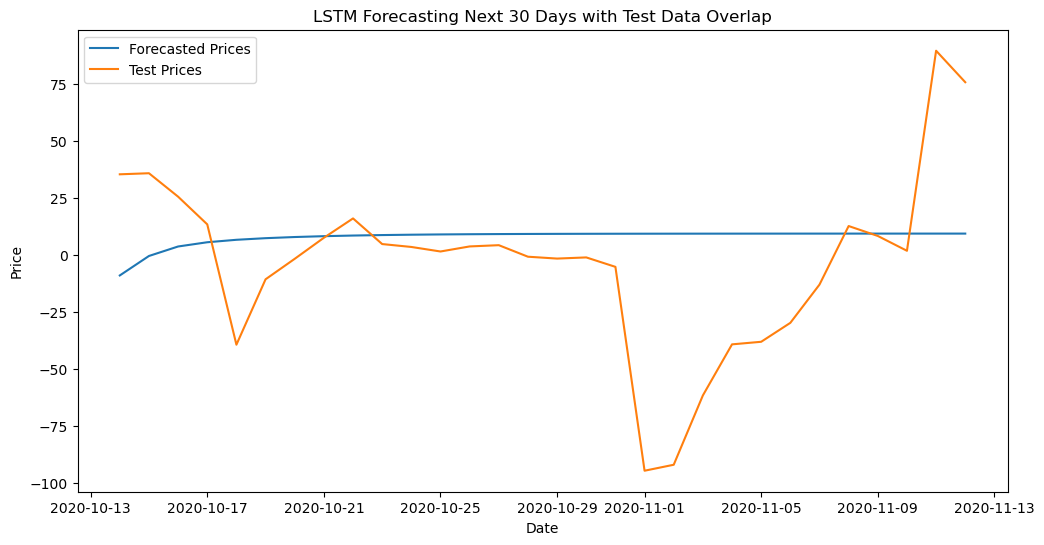

Mean Error (LSTM): 15.785554761132518


In [90]:
# Set the number of time steps and forecast steps
time_steps = 3  # You can adjust this parameter based on your data and problem
forecast_steps = 30  # Number of days to forecast

# Create LSTM input data for training
X_train, y_train = create_lstm_dataset(price_series_scaled, time_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Create LSTM input data for forecasting (using the last 'time_steps' data points from training data)
X_forecast = price_series_scaled[-time_steps:].reshape(1, -1, 1)

# Forecast the next 'forecast_steps' days
forecast_predictions_scaled = []
for _ in range(forecast_steps):
    forecast = model.predict(X_forecast)
    forecast_predictions_scaled.append(forecast[0, 0])
    X_forecast = np.roll(X_forecast, -1)
    X_forecast[0, -1, 0] = forecast

# Invert the forecast predictions to original scale
forecast_predictions_original = scaler.inverse_transform(np.array(forecast_predictions_scaled).reshape(-1, 1))

# Visualize the results (forecasted data, and test data)
plt.figure(figsize=(12, 6))
plt.plot(test.index[:30], forecast_predictions_original, label='Forecasted Prices')
plt.plot(test.index[:forecast_steps], test['diff'].values[:forecast_steps], label='Test Prices')
plt.title('LSTM Forecasting Next 30 Days with Test Data Overlap')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate mean error using the test data
mean_error = np.mean(np.abs(test['diff'].values - forecast_predictions_original[:forecast_steps]))
print(f"Mean Error (LSTM): {mean_error}")


In [91]:
# Calculate the index for splitting (80% for training, 20% for testing)
split_index = int(0.8 * len(a1))

# Split the dataset into training and testing sets
train = a1.iloc[:split_index]
test = a1.iloc[split_index:]

# Display the shapes of the training and testing sets
print("Training Set Shape:", train.shape)
print("Testing Set Shape:", test.shape)

Training Set Shape: (1745, 1)
Testing Set Shape: (437, 1)


## Evaluation Metric MAPE

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [93]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Smoothing

In [94]:
ses_model = SimpleExpSmoothing(train["price"]).fit(smoothing_level=0.7)
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses["Exp_Smoothing"],test.price) 

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



6.3174505837272354

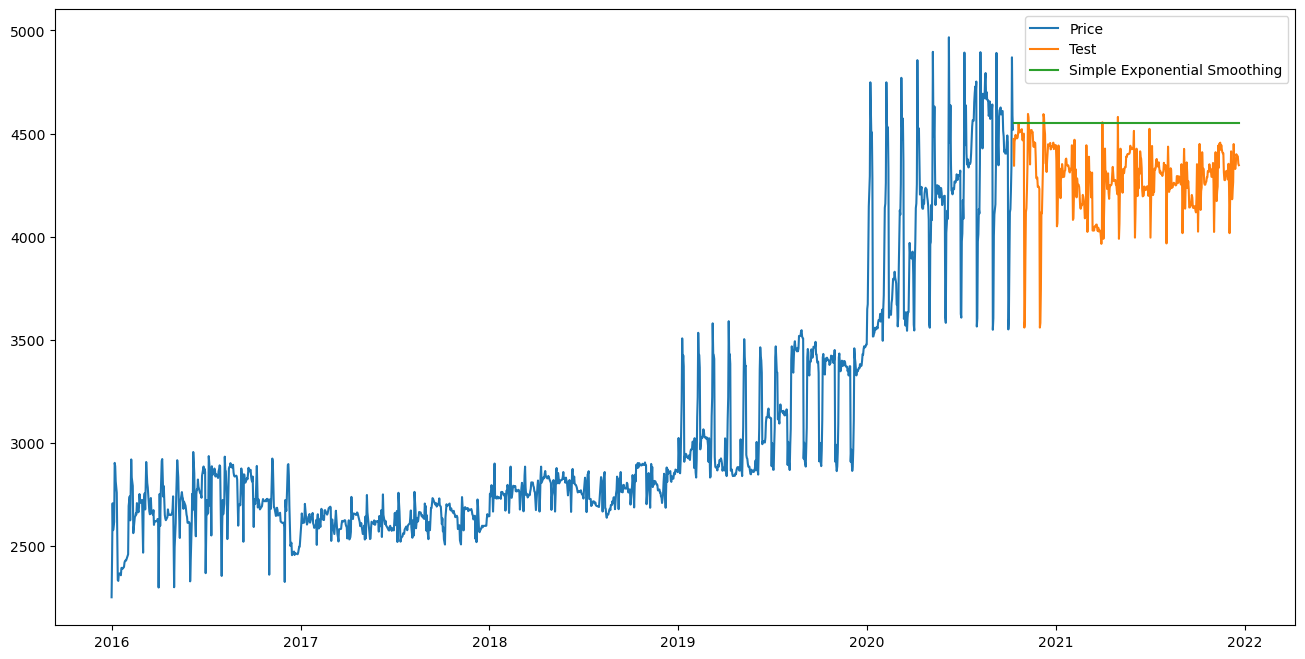

In [95]:
plt.figure(figsize=(16,8))
plt.plot(train["price"], label='Price')
plt.plot(test["price"], label='Test')
plt.plot(pred_ses["Exp_Smoothing"], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

## Holt method

In [96]:
# Grid search for Holt-Winters parameters
best_mape = float('inf')
best_params = None

for smoothing_level in np.arange(0.1, 1.0, 0.1):
    for smoothing_trend in np.arange(0.1, 1.0, 0.1):
        hw_model = ExponentialSmoothing(train["price"], trend="add", seasonal="add", seasonal_periods=12).fit(
            smoothing_level=smoothing_level, smoothing_trend=smoothing_trend
        )
        pred_hw = hw_model.predict(start=test.index[0], end=test.index[-1])
        mape = MAPE(pred_hw, test["price"])
        
        if mape < best_mape:
            best_mape = mape
            best_params = {"smoothing_level": smoothing_level, "smoothing_trend": smoothing_trend}

# Train the final Holt-Winters model with the best parameters on the entire dataset
final_hw_model = ExponentialSmoothing(a1["price"], trend="add", seasonal="add", seasonal_periods=12).fit(
    smoothing_level=best_params["smoothing_level"], smoothing_trend=best_params["smoothing_trend"]
)
final_pred_hw = {}
# Make predictions for the test set
final_pred_hw["holt_method"] = final_hw_model.predict(start=test.index[0], end=test.index[-1])

# Display the best parameters and MAPE
print("Best Holt-Winters Parameters:")
print(best_params)
print("MAPE on Test Set:", best_mape)

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was

Best Holt-Winters Parameters:
{'smoothing_level': 0.8, 'smoothing_trend': 0.5}
MAPE on Test Set: 9.708829569157277


C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



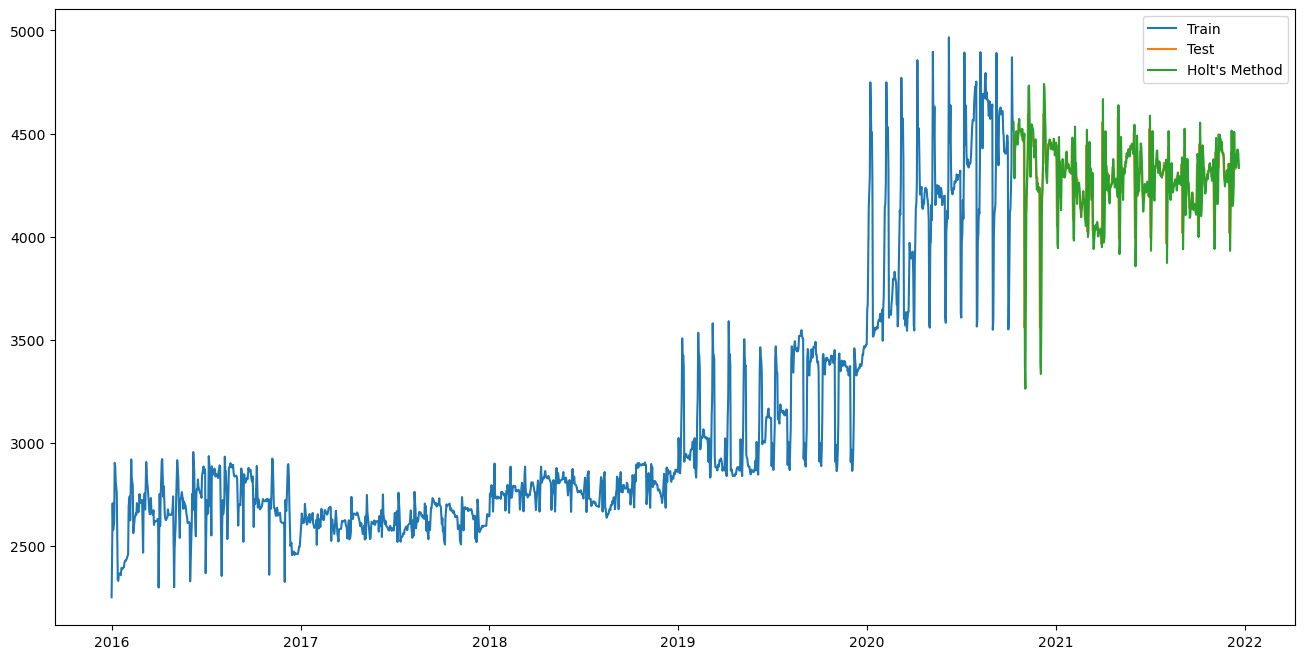

In [97]:
plt.figure(figsize=(16,8))
plt.plot(train["price"], label='Train')
plt.plot(test["price"], label='Test')
plt.plot(final_pred_hw["holt_method"], label="Holt's Method")
plt.legend(loc='best')
plt.show()

## Holts winter exponential smoothing with mul seasonality and additive trend

In [98]:
hwe_model_add_add = ExponentialSmoothing(train["price"],seasonal="multiplicative",trend="add",seasonal_periods=31).fit() #add the trend to the model
pred_hwe_add_add = pd.DataFrame()
pred_hwe_add_add["holt_winter_method"] = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add["holt_winter_method"],test.price) 

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



8.84007545907398

In [99]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Grid search for Holt-Winters parameters
best_mape = float('inf')
best_params = None

for trend_type in ["add", "additive"]:
    for seasonal_type in ["mul", "multiplicative"]:
        for seasonal_periods in range(20, 50):
            hwe_model = ExponentialSmoothing(train["price"], seasonal=seasonal_type, trend=trend_type, seasonal_periods=seasonal_periods).fit()
            pred_hwe = hwe_model.predict(start=test.index[0], end=test.index[-1])
            mape = MAPE(pred_hwe, test["price"])
            
            if mape < best_mape:
                best_mape = mape
                best_params = {"seasonal": seasonal_type, "trend": trend_type, "seasonal_periods": seasonal_periods}

# Train the final Holt-Winters model with the best parameters on the entire dataset
final_hwe_model = ExponentialSmoothing(a1["price"], seasonal=best_params["seasonal"], trend=best_params["trend"], seasonal_periods=best_params["seasonal_periods"]).fit()

# Make predictions for the test set
final_pred_hwe = final_hwe_model.predict(start=test.index[0], end=test.index[-1])

# Display the best parameters and MAPE
print("Best Holt-Winters Parameters:")
print(best_params)
print("MAPE on Test Set:", best_mape)


C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so in

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was

Best Holt-Winters Parameters:
{'seasonal': 'mul', 'trend': 'add', 'seasonal_periods': 40}
MAPE on Test Set: 3.033993393050866


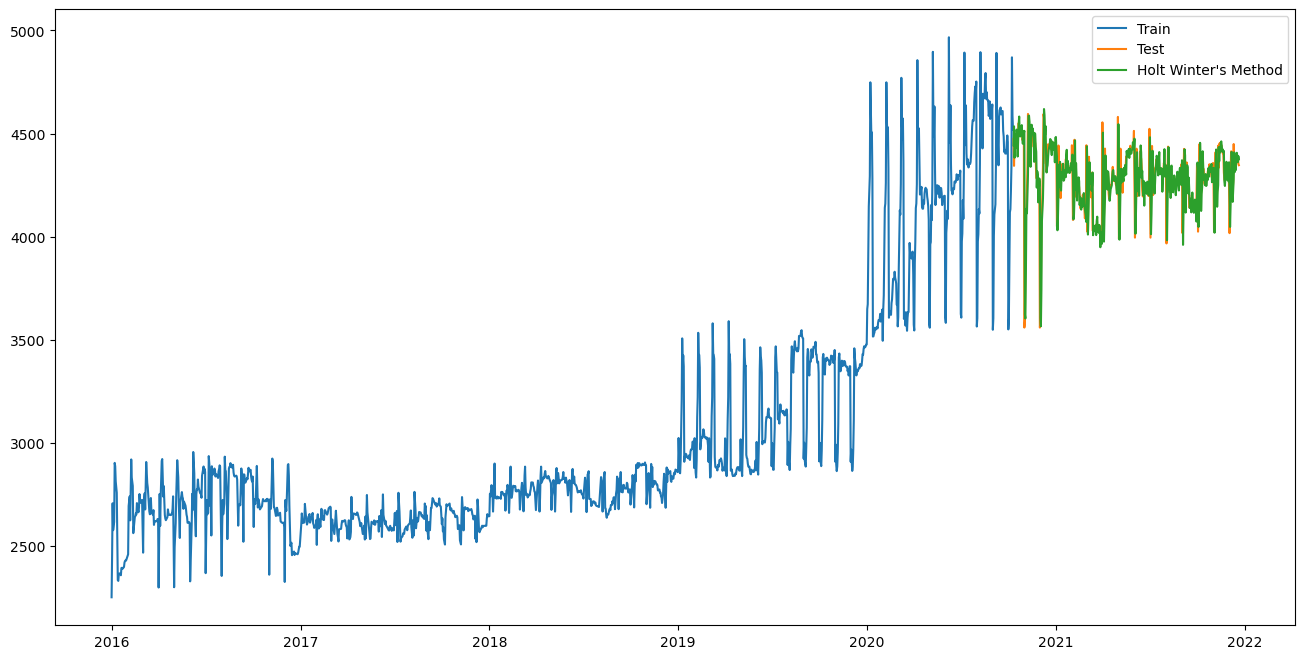

In [100]:
plt.figure(figsize=(16,8))
plt.plot(train["price"], label='Train')
plt.plot(test["price"], label='Test')
plt.plot(final_pred_hwe, label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

## Final Model by combining train and test

In [107]:
# Use the best parameters from the grid search to fit the model
hwe_model_mul_add = ExponentialSmoothing(
    a1.price,
    seasonal=best_params["seasonal"],
    trend=best_params["trend"],
    seasonal_periods=best_params["seasonal_periods"]
).fit()


C:\Users\Tirum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [108]:
#Forecasting for next 10 time periods
future_data = hwe_model_mul_add.forecast(30)
future_data

2021-12-22    4339.968626
2021-12-23    4374.236842
2021-12-24    4359.347494
2021-12-25    4321.332185
2021-12-26    4318.717686
2021-12-27    4356.627527
2021-12-28    4350.802032
2021-12-29    4340.687340
2021-12-30    4351.899993
2021-12-31    4356.176977
2022-01-01    4361.604455
2022-01-02    4314.495772
2022-01-03    4286.813550
2022-01-04    4302.149821
2022-01-05    4301.363913
2022-01-06    4346.871053
2022-01-07    4333.570138
2022-01-08    4341.496298
2022-01-09    4336.990710
2022-01-10    4332.381512
2022-01-11    4334.956932
2022-01-12    4306.408130
2022-01-13    4340.659525
2022-01-14    4331.853704
2022-01-15    4327.675460
2022-01-16    4322.722809
2022-01-17    4348.699085
2022-01-18    4334.029648
2022-01-19    4341.674099
2022-01-20    4363.689064
Freq: D, dtype: float64

In [103]:
a1['price'].iloc[2155:]

date
2021-11-25    4278.3
2021-11-26    4315.7
2021-11-27    4318.9
2021-11-28    4318.9
2021-11-29    4303.9
2021-11-30    4277.0
2021-12-01    4353.2
2021-12-02    4238.1
2021-12-03    4017.1
2021-12-04    4170.4
2021-12-05    4305.5
2021-12-06    4413.6
2021-12-07    4319.4
2021-12-08    4181.5
2021-12-09    4219.4
2021-12-10    4264.7
2021-12-11    4448.9
2021-12-12    4333.5
2021-12-13    4351.4
2021-12-14    4328.2
2021-12-15    4348.7
2021-12-16    4399.8
2021-12-17    4394.4
2021-12-18    4389.5
2021-12-19    4389.5
2021-12-20    4354.1
2021-12-21    4346.5
Name: price, dtype: float64

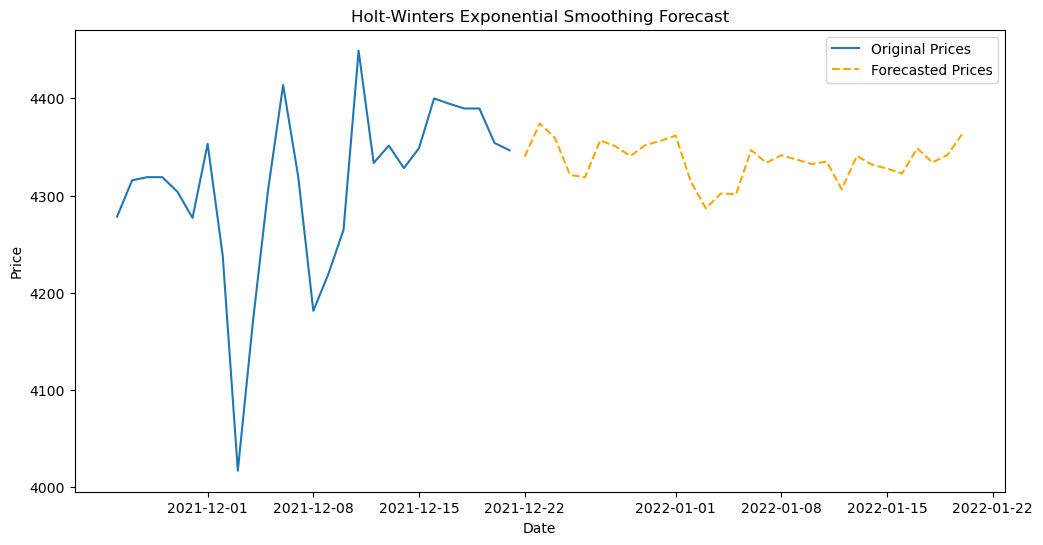

In [104]:
import matplotlib.pyplot as plt

# Forecast the next 30 time periods
future_data = hwe_model_mul_add.forecast(steps=30)

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(a1.index[2155:], a1['price'].iloc[2155:], label='Original Prices')
plt.plot(future_data.index, future_data, label='Forecasted Prices', linestyle='dashed', color='orange')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [106]:
import pickle

# Save the model to a pickle file
with open('hwe_model_mul_add.pkl', 'wb') as f:
    pickle.dump(hwe_model_mul_add, f)

# Download the pickle file using the IPython display module
from IPython.display import FileLink
FileLink(r'hwe_model_mul_add.pkl')


C:\Users\Tirum\hwe_model_mul_add.pkl